In [1]:
import numpy as np
import os
import time
import scipy
import math
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.ticker as mtick
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from sklearn.preprocessing import MinMaxScaler



from distribution import TransferDistribution
# from LDPCP import LDPTreeClassifier


# Parameter Region Illustration Plot

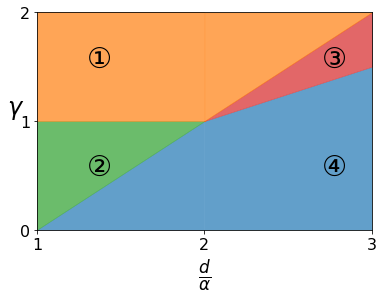

In [113]:

n_per_len = 400

# Create data points
x1 = np.linspace(1, 2, n_per_len)
x2 = np.linspace(2, 3, n_per_len)

y1 = x1 * 0.5
y2 = x2 * 0.5
y3 = x1 - 1
y4 = x2 - 1
y5 = np.zeros(n_per_len)
y6 = np.ones(n_per_len) * 2 
y7 = np.ones(n_per_len)

fig, ax = plt.subplots()

# Plot the filled regions
alpha_level = 0.7
lw = 0.5
_ = ax.fill_between(x1, y5, y3, alpha=alpha_level, color='#1f77b4', linewidth = lw/4, edgecolor = "#1f77b4")
_ = ax.fill_between(x1, y3, y7, alpha=alpha_level, color='#2ca02c', linewidth = lw, edgecolor = "#2ca02c")
_ = ax.fill_between(x1, y7, y6, alpha=alpha_level, color='#ff7f0e', linewidth = lw, edgecolor = "#ff7f0e")
_ = ax.fill_between(x2, y5, y2, alpha=alpha_level, color='#1f77b4', linewidth = 0, edgecolor = "#1f77b4")
_ = ax.fill_between(x2, y2, y4, alpha=alpha_level, color='#d62728', linewidth = lw, edgecolor = "#d62728")
_ = ax.fill_between(x2, y4, y6, alpha=alpha_level, color='#ff7f0e', linewidth = lw, edgecolor = "#ff7f0e")

_ = ax.text(1.3, 1.5, r"①", fontsize = 28)
_ = ax.text(1.3, 0.5, r"②", fontsize = 28)
_ = ax.text(2.7, 1.5, r"③", fontsize = 28)
_ = ax.text(2.7, 0.5, r"④", fontsize = 28)

    

# Set plot labels and title
_ = plt.ylabel(r"$\gamma$",fontsize=24, rotation = 0)
_ = plt.xlabel(r"$\frac{d}{\alpha}$",fontsize=24)
_ = plt.xlim(1, 3)
_ = plt.ylim(0, 2)
# plt.legend(fontsize = 16)
_ = plt.xticks(fontsize=16)
_ = plt.yticks(fontsize=16)

_ = ax.set_yticks([ 0, 1, 2])
_ = ax.set_xticks([1, 2, 3])

# Show the plot
_ = plt.savefig("./results/plot/phase_illustration.pdf",bbox_inches="tight")


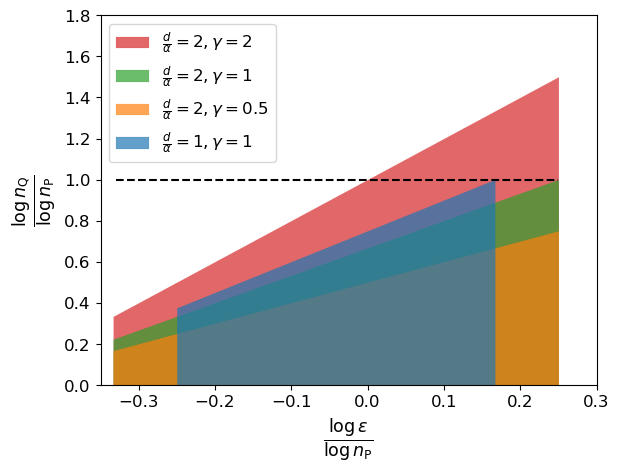

In [58]:

n_per_len = 400

fig, ax = plt.subplots()


dar = 2
gamma = 2
x = np.linspace(- dar / (2 + 2 * dar), dar / (4 + 2 * dar), n_per_len)
y1 =  (2 * gamma + dar) / (1 + dar)  * x  + (2 * gamma + dar) / (2 + 2 * dar)
y2 = np.zeros(n_per_len)
alpha_level = 0.7
lw = 0.5
_ = ax.fill_between(x, y1, y2, alpha=alpha_level, color='#d62728', linewidth = lw/4, edgecolor = "#d62728", label = r"$\frac{d}{\alpha} = 2, \gamma = 2$")


dar = 2
gamma = 1
x = np.linspace(- dar / (2 + 2 * dar), dar / (4 + 2 * dar), n_per_len)
y1 =  (2 * gamma + dar) / (1 + dar)  * x  + (2 * gamma + dar) / (2 + 2 * dar)
y2 = np.zeros(n_per_len)
alpha_level = 0.7
lw = 0.5
_ = ax.fill_between(x, y1, y2, alpha=alpha_level, color='#2ca02c', linewidth = lw/4, edgecolor = "#2ca02c", label = r"$\frac{d}{\alpha} = 2, \gamma = 1$")


dar = 2
gamma = 0.5
x = np.linspace(- dar / (2 + 2 * dar), dar / (4 + 2 * dar), n_per_len)
y1 =  (2 * gamma + dar) / (1 + dar)  * x  + (2 * gamma + dar) / (2 + 2 * dar)
y2 = np.zeros(n_per_len)
alpha_level = 0.7
lw = 0.5
_ = ax.fill_between(x, y1, y2, alpha=alpha_level, color='#ff7f0e', linewidth = lw/4, edgecolor = "#ff7f0e", label = r"$\frac{d}{\alpha} = 2, \gamma = 0.5$")


dar = 1
gamma = 1
x = np.linspace(- dar / (2 + 2 * dar), dar / (4 + 2 * dar), n_per_len)
y1 =  (2 * gamma + dar) / (1 + dar)  * x  + (2 * gamma + dar) / (2 + 2 * dar)
y2 = np.zeros(n_per_len)
alpha_level = 0.7
lw = 0.5
_ = ax.fill_between(x, y1, y2, alpha=alpha_level, color='#1f77b4', linewidth = lw/4, edgecolor = "#1f77b4", label = r"$\frac{d}{\alpha} = 1, \gamma = 1$")


_ = plt.hlines(1, -0.33, 0.25, colors = "black", linestyle = "dashed")




    

# Set plot labels and title
_ = plt.ylabel(r"$\frac{\log n_{\mathrm{Q}}}{\log n_{\mathrm{P}}}$",fontsize=18)
_ = plt.xlabel(r"$\frac{\log \varepsilon}{\log n_{\mathrm{P}}}$",fontsize=18)
_ = plt.xlim(-0.35 , 0.3)
_ = plt.ylim(0, 1.8)
_ = plt.xticks(fontsize=12)
_ = plt.yticks(fontsize=12)
_ = plt.legend(loc = 2, fontsize = 12)


# # Show the plot
_ = plt.savefig("./results/plot/phase_illustration_2.pdf",bbox_inches="tight")


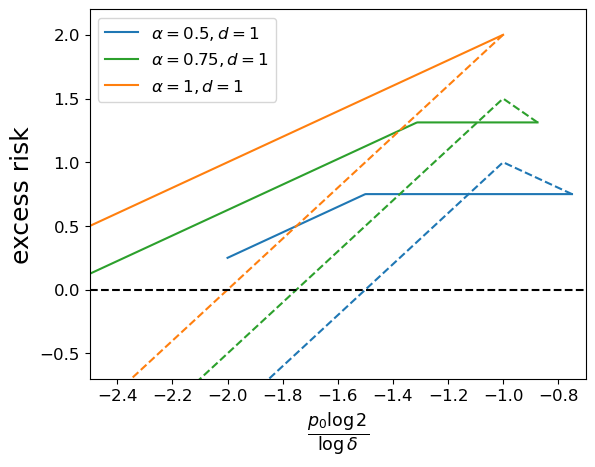

In [148]:

n_per_len = 400

fig, ax = plt.subplots()



beta = 1



alpha = 0.5
d = 1
x = np.linspace(- (2 * alpha + 2 * d) / (2 + 2 * d), - (2 * alpha + d) / d, n_per_len)
y1 =  np.array([np.min([((alpha + d) * (2 + d) / d / (2 + 2 * d) + xs / 2 ) * (beta + 1), (alpha * (alpha + d) / d / (1 + d)  ) * (beta + 1)]) for xs in x])
y2 =  np.array([np.min([( (alpha + d) / d + xs  ) * (beta + 1), (- xs * alpha / d ) * (beta + 1)]) for xs in x])
_ = plt.plot(x, y1, color='#1f77b4', linestyle = "solid", label = r"$\alpha = 0.5, d = 1$")
_ = plt.plot(x, y2, color='#1f77b4', linestyle = "dashed")


alpha = 0.75
d = 1
x = np.linspace(- (2 * alpha + 2 * d) / (2 + 2 * d), - (2 * alpha + d) / d, n_per_len)
y1 =  np.array([np.min([((alpha + d) * (2 + d) / d / (2 + 2 * d) + xs / 2 ) * (beta + 1), (alpha * (alpha + d) / d / (1 + d)  ) * (beta + 1)]) for xs in x])
y2 =  np.array([np.min([( (alpha + d) / d + xs  ) * (beta + 1), (- xs * alpha / d ) * (beta + 1)]) for xs in x])
_ = plt.plot(x, y1, color='#2ca02c', linestyle = "solid", label = r"$\alpha = 0.75, d = 1$")
_ = plt.plot(x, y2, color='#2ca02c', linestyle = "dashed")


alpha = 1
d = 1
x = np.linspace(- (2 * alpha + 2 * d) / (2 + 2 * d), - (2 * alpha + d) / d, n_per_len)
y1 =  np.array([np.min([((alpha + d) * (2 + d) / d / (2 + 2 * d) + xs / 2 ) * (beta + 1), (alpha * (alpha + d) / d / (1 + d)  ) * (beta + 1)]) for xs in x])
y2 =  np.array([np.min([( (alpha + d) / d + xs  ) * (beta + 1), (- xs * alpha / d ) * (beta + 1)]) for xs in x])
_ = plt.plot(x, y1, color='#ff7f0e', linestyle = "solid", label = r"$\alpha = 1, d = 1$")
_ = plt.plot(x, y2, color='#ff7f0e', linestyle = "dashed")



_ = plt.xlim(- 2.5, -0.7)
_ = plt.ylim(- 0.7, 2.2)
_ = plt.hlines(0, -2.5, -0.7, color = "black", linestyle = "dashed")
_ = plt.xticks(fontsize=12)
_ = plt.yticks(fontsize=12)
_ = plt.xlabel(r"$\frac{p_0 \log 2}{\log \delta}$", fontsize = 18)
_ = plt.ylabel("excess risk", fontsize = 18)

_ = plt.legend(fontsize = 12)

# # Show the plot
_ = plt.savefig("./results/plot/phase_illustration_3.pdf",bbox_inches="tight")




# Simulation Distribution 

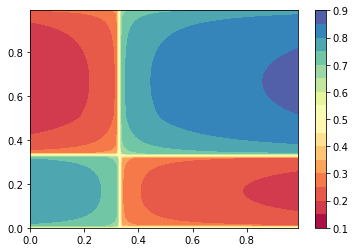

In [114]:
distribution = TransferDistribution(4).returnDistribution()


axis0,axis1 = np.meshgrid(np.arange(0,1,0.01),np.arange(0,1,0.01))
X_grid = np.array([axis0.ravel(),axis1.ravel()]).T
y, _ = distribution.evaluate(X_P = X_grid)
y = y.reshape(-1,axis1.shape[0])

cfplot = plt.contourf(axis0, axis1, y ,cmap = plt.cm.Spectral, levels = [0.05 * i + 0.1 for i in range(17)])
cbar = plt.colorbar(cfplot)


plt.savefig("./results/plot/distribution-1.pdf",bbox_inches="tight")

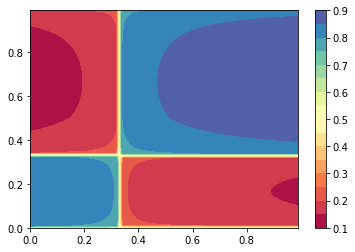

In [115]:
distribution = TransferDistribution(4).returnDistribution()


axis0,axis1 = np.meshgrid(np.arange(0,1,0.01),np.arange(0,1,0.01))
X_grid = np.array([axis0.ravel(),axis1.ravel()]).T
_, y = distribution.evaluate(X_Q = X_grid)
y = y.reshape(-1,axis1.shape[0])

cfplot = plt.contourf(axis0, axis1, y ,cmap = plt.cm.Spectral, levels = [0.05 * i + 0.1 for i in range(17)])
cbar = plt.colorbar(cfplot)

plt.savefig("./results/plot/distribution-2.pdf",bbox_inches="tight")

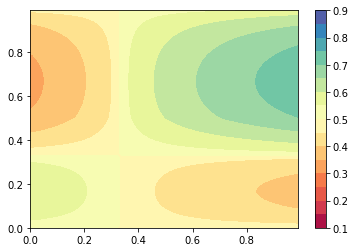

In [116]:
distribution = TransferDistribution(5).returnDistribution()


axis0,axis1 = np.meshgrid(np.arange(0,1,0.01),np.arange(0,1,0.01))
X_grid = np.array([axis0.ravel(),axis1.ravel()]).T
_, y = distribution.evaluate(X_Q = X_grid)
y = y.reshape(-1,axis1.shape[0])

cfplot = plt.contourf(axis0, axis1, y ,cmap = plt.cm.Spectral, levels = [0.05 * i + 0.1 for i in range(17)])
cbar = plt.colorbar(cfplot)

plt.savefig("./results/plot/distribution-3.pdf",bbox_inches="tight")

# epsilon - acc

In [2]:
# filtering out the results in values_to_filter
report_method = ["LDPTC-M", "LDPTC-M-P", "LDPTC-M-Q"]
all_log = pd.DataFrame([])
log_file_dir = "./results/epsilon_acc" 

for method in report_method:
    log = pd.read_csv("{}/{}.csv".format(log_file_dir,method), header=None)
    log.columns = "distribution_index,method,iterate,epsilon,n_train,n_pub,accuracy,bce,time_used,max_depth,min_samples_leaf,lamda".split(',')
    all_log = all_log.append(log)
    
values_to_filter = {
    "distribution_index": [4,5],
    "method": [
               "LDPTC-M", "LDPTC-M-P", "LDPTC-M-Q",
              ],
    "epsilon": [0.5, 1, 2, 4, 8,1000],
    "n_train": [10000],
    "n_pub": [50, 1000], 
}
mask_list = [all_log[col].isin(values) for col, values in values_to_filter.items()]
combined_mask = mask_list[0]
for mask in mask_list[1:]:
    combined_mask = combined_mask & mask
filtered_log = all_log[combined_mask]


best_result_log = filtered_log.groupby(by=["distribution_index", "method", "epsilon", "n_train", "n_pub", "max_depth", "min_samples_leaf", "lamda"]).agg('mean').reset_index()
df_mean = best_result_log.groupby(by=["distribution_index", "method", "epsilon", "n_train", "n_pub"]).agg('max').reset_index()


# filtering out the results in values_to_filter
report_method = ["LDPTC-M"]
all_log = pd.DataFrame([])
log_file_dir = "./results/prune" 

for method in report_method:
    log = pd.read_csv("{}/{}.csv".format(log_file_dir,method), header=None)
    log.columns = "distribution_index,method,iterate,epsilon,n_train,n_pub,accuracy,bce,time_used,max_depth,min_depth,lamda".split(',')
    all_log = all_log.append(log)
    
values_to_filter = {
    "distribution_index": [4,5],
    "method": [
               "LDPTC-M",
              ],
    "epsilon": [0.5, 1, 2, 4, 8,1000],
    "n_train": [10000],
    "n_pub": [50, 1000], 
}
mask_list = [all_log[col].isin(values) for col, values in values_to_filter.items()]
combined_mask = mask_list[0]
for mask in mask_list[1:]:
    combined_mask = combined_mask & mask
filtered_log = all_log[combined_mask]


best_result_log = filtered_log.groupby(by=["distribution_index", "method", "epsilon", "n_train", "n_pub", "max_depth", "min_depth", "lamda"]).agg('mean').reset_index()
df_mean_prune = best_result_log.groupby(by=["distribution_index", "method", "epsilon", "n_train", "n_pub"]).agg('max').reset_index()


/tmp/ipykernel_63454/4277939362.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_log = all_log.append(log)
/tmp/ipykernel_63454/4277939362.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_log = all_log.append(log)
/tmp/ipykernel_63454/4277939362.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_log = all_log.append(log)
/tmp/ipykernel_63454/4277939362.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_log = all_log.append(log)


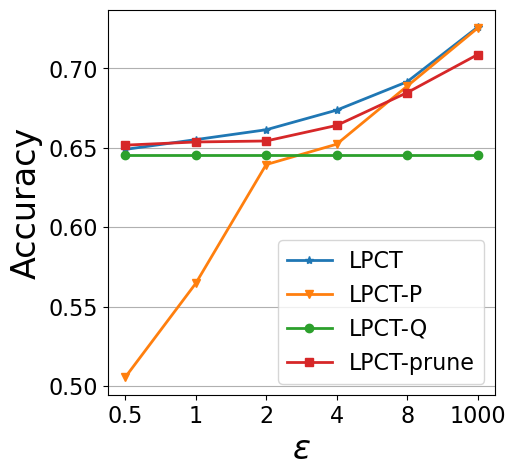

In [7]:

fig, ax = plt.subplots(figsize=(5,5))


# extract out the data for plot of LPCT-M, LPCT-M-P, LPCT-M-Q
x = [0,1,2,3,4,5]
y = df_mean['accuracy'][(df_mean["method"] == "LDPTC-M") * (df_mean["n_pub"] == 50)]
_ = plt.plot(x,y,linewidth=2,label='LPCT',marker = "*")

y = df_mean['accuracy'][(df_mean["method"] == "LDPTC-M-P") * (df_mean["n_pub"] == 50)]
_ = plt.plot(x,y,linewidth=2,label='LPCT-P',marker = "v")

y = df_mean['accuracy'][(df_mean["method"] == "LDPTC-M-Q") * (df_mean["n_pub"] == 50)]
_ = plt.plot(x,y,linewidth=2,label='LPCT-Q',marker = "o")

y = df_mean_prune['accuracy'][(df_mean_prune["method"] == "LDPTC-M") * (df_mean_prune["n_pub"] == 50)]
_ = plt.plot(x,y,linewidth=2,label='LPCT-prune',marker = "s")



_ = plt.ylabel("Accuracy", fontsize=24)
_ = plt.xlabel(r"$\varepsilon$", fontsize=24)
_ = plt.legend(fontsize = 16, loc = 4)
_ = plt.xticks(fontsize = 16)
_ = plt.yticks(fontsize = 16)
_ = plt.grid(axis = 'y')

_ = ax.set_xticks( [0,1,2,3,4,5], [0.5, 1, 2, 4, 8,1000])
plt.savefig("./results/plot/epsilon-acc-50.pdf",bbox_inches="tight")

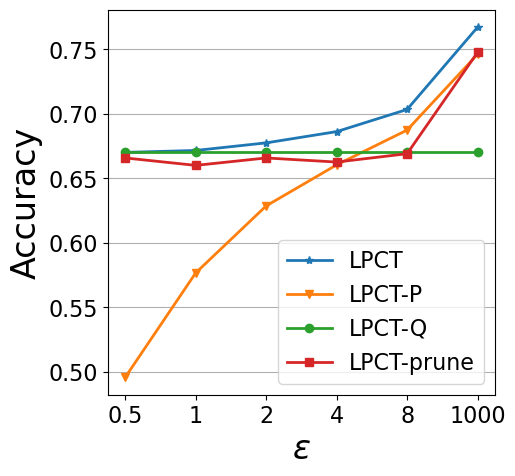

In [8]:

fig, ax = plt.subplots(figsize=(5,5))


# extract out the data for plot of LPCT-M, LPCT-M-P, LPCT-M-Q
x = [0,1,2,3,4,5]
y = df_mean['accuracy'][(df_mean["method"] == "LDPTC-M") * (df_mean["n_pub"] == 1000)]
_ = plt.plot(x,y,linewidth=2,label='LPCT',marker = "*")

y = df_mean['accuracy'][(df_mean["method"] == "LDPTC-M-P") * (df_mean["n_pub"] == 1000)]
_ = plt.plot(x,y,linewidth=2,label='LPCT-P',marker = "v")

y = df_mean['accuracy'][(df_mean["method"] == "LDPTC-M-Q") * (df_mean["n_pub"] == 1000)]
_ = plt.plot(x,y,linewidth=2,label='LPCT-Q',marker = "o")

y = df_mean_prune['accuracy'][(df_mean_prune["method"] == "LDPTC-M") * (df_mean_prune["n_pub"] == 1000)]
_ = plt.plot(x,y,linewidth=2,label='LPCT-prune',marker = "s")




_ = plt.ylabel("Accuracy", fontsize=24)
_ = plt.xlabel(r"$\varepsilon$", fontsize=24)
_ = plt.legend(fontsize = 16, loc = 4)
_ = plt.xticks(fontsize = 16)
_ = plt.yticks(fontsize = 16)
_ = plt.grid(axis = 'y')

_ = ax.set_xticks( [0,1,2,3,4,5], [0.5, 1, 2, 4, 8,1000])
plt.savefig("./results/plot/epsilon-acc-1000.pdf",bbox_inches="tight")

# gamma - acc

In [6]:
# filtering out the results in values_to_filter
report_method = ["LDPTC-M"]
all_log = pd.DataFrame([])
log_file_dir = "./results/gamma" 

for method in report_method:
    log = pd.read_csv("{}/{}.csv".format(log_file_dir,method), header=None)
    log.columns = "gamma,method,iterate,epsilon,n_train,n_pub,accuracy,bce,time_used,max_depth,min_samples_leaf,lamda".split(',')
    all_log = all_log.append(log)
    
values_to_filter = {
    "gamma": [0.5, 0.75,1,1.25,1.5,2],
    "method": [
               "LDPTC-M"
              ],
    "epsilon": [0.5, 1, 2, 4, 8,1000],
    "n_train": [10000],
    "n_pub": [50], 
}
mask_list = [all_log[col].isin(values) for col, values in values_to_filter.items()]
combined_mask = mask_list[0]
for mask in mask_list[1:]:
    combined_mask = combined_mask & mask
filtered_log = all_log[combined_mask]


best_result_log = filtered_log.groupby(by=["gamma", "method", "epsilon", "n_train", "n_pub", "max_depth", "min_samples_leaf", "lamda"]).agg('mean').reset_index()
df_mean = best_result_log.groupby(by=["gamma", "method", "epsilon", "n_train", "n_pub"]).agg('max').reset_index()



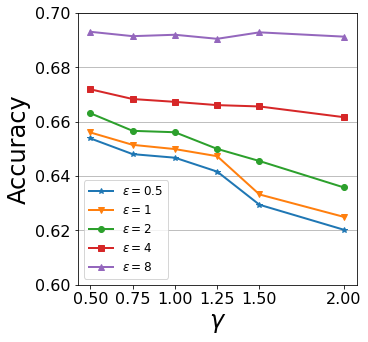

In [18]:

fig, ax = plt.subplots(figsize=(5,5))


# extract out the data for plot of LPCT-M, LPCT-M-P, LPCT-M-Q
x = [0.5, 0.75,1,1.25,1.5,2]
y = df_mean['accuracy'][ (df_mean["epsilon"] == 0.5)]
_ = plt.plot(x,y,linewidth=2,label=r'$\varepsilon=0.5$',marker = "*")

y = df_mean['accuracy'][ (df_mean["epsilon"] == 1)]
_ = plt.plot(x,y,linewidth=2,label=r'$\varepsilon=1$',marker = "v")

y = df_mean['accuracy'][ (df_mean["epsilon"] == 2)]
_ = plt.plot(x,y,linewidth=2,label=r'$\varepsilon=2$',marker = "o")

y = df_mean['accuracy'][ (df_mean["epsilon"] == 4)]
_ = plt.plot(x,y,linewidth=2,label=r'$\varepsilon=4$',marker = "s")

y = df_mean['accuracy'][ (df_mean["epsilon"] == 8)]
_ = plt.plot(x,y,linewidth=2,label=r'$\varepsilon=8$',marker = "^")



_ = plt.ylabel("Accuracy", fontsize=24)
_ = plt.xlabel(r"$\gamma$", fontsize=24)
_ = plt.ylim(0.6,0.7)
_ = plt.legend(fontsize = 12, loc = 3)
_ = plt.xticks(fontsize = 16)
_ = plt.yticks(fontsize = 16)
_ = plt.grid(axis = 'y')

_ = ax.set_xticks( x)
plt.savefig("./results/plot/gamma-acc.pdf",bbox_inches="tight")

# np - acc

In [9]:

report_method = ["LDPTC-M", "LDPTC-M-P", "LDPTC-M-Q"]


all_log = pd.DataFrame([])
log_file_dir = "./results/np_acc" 


for method in report_method:
    log = pd.read_csv("{}/{}.csv".format(log_file_dir,method), header=None)
    log.columns = "distribution_index,method,iterate,epsilon,n_train,n_pub,accuracy,bce,time_used,max_depth,min_samples_leaf,lamda".split(',')
    all_log = all_log.append(log)
    
    
filter_columns = ["distribution_index", "method", "epsilon", "n_train", "n_pub"]
unique_values_dict = {col: all_log[col].unique().tolist() for col in filter_columns}

unique_values_dict

values_to_filter = {
    "distribution_index": [4],
    "method": [
               "LDPTC-M", "LDPTC-M-P", "LDPTC-M-Q"
              ],
    "epsilon": [0.5, 1, 2, 4, 8, 1000],
    "n_train": [4000, 6000, 8000, 10000, 12000, 14000, 16000],
    "n_pub": [ 50], 
}

mask_list = [all_log[col].isin(values) for col, values in values_to_filter.items()]
combined_mask = mask_list[0]
for mask in mask_list[1:]:
    combined_mask = combined_mask & mask
filtered_log = all_log[combined_mask]
    
    
best_result_log = filtered_log.groupby(by=["distribution_index", "method", "epsilon", "n_train", "n_pub", "max_depth", "min_samples_leaf", "lamda"]).agg('mean').reset_index()
df_mean = best_result_log.groupby(by=["distribution_index", "method", "epsilon", "n_train", "n_pub"]).agg('max').reset_index()



# filtering out the results in values_to_filter
report_method = ["LDPTC-M"]
all_log = pd.DataFrame([])
log_file_dir = "./results/prune" 

for method in report_method:
    log = pd.read_csv("{}/{}.csv".format(log_file_dir,method), header=None)
    log.columns = "distribution_index,method,iterate,epsilon,n_train,n_pub,accuracy,bce,time_used,max_depth,min_depth,lamda".split(',')
    all_log = all_log.append(log)
    
values_to_filter = {
    "distribution_index": [4],
    "method": [
               "LDPTC-M",
              ],
    "epsilon": [0.5, 1, 2, 4, 8,1000],
    "n_pub": [50], 
}
mask_list = [all_log[col].isin(values) for col, values in values_to_filter.items()]
combined_mask = mask_list[0]
for mask in mask_list[1:]:
    combined_mask = combined_mask & mask
filtered_log = all_log[combined_mask]


best_result_log = filtered_log.groupby(by=["distribution_index", "method", "epsilon", "n_train", "n_pub", "max_depth", "min_depth", "lamda"]).agg('mean').reset_index()
df_mean_prune = best_result_log.groupby(by=["distribution_index", "method", "epsilon", "n_train", "n_pub"]).agg('max').reset_index()


/tmp/ipykernel_63454/102080547.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_log = all_log.append(log)
/tmp/ipykernel_63454/102080547.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_log = all_log.append(log)
/tmp/ipykernel_63454/102080547.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_log = all_log.append(log)


{'distribution_index': [4],
 'method': ['LDPTC-M', 'LDPTC-M-P', 'LDPTC-M-Q'],
 'epsilon': [0.5, 1.0, 2.0, 4.0, 8.0, 1000.0],
 'n_train': [4000, 6000, 8000, 10000, 12000, 14000, 16000],
 'n_pub': [50]}

/tmp/ipykernel_63454/102080547.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_log = all_log.append(log)


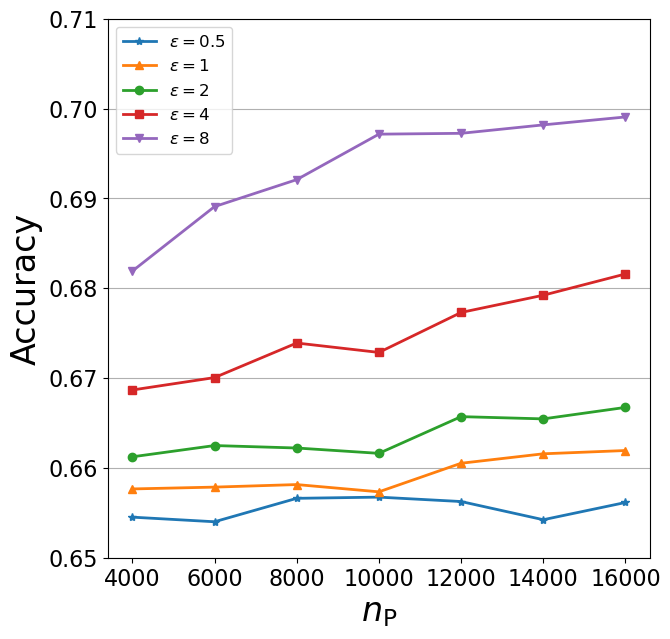

In [10]:



fig, ax = plt.subplots(figsize=(7,7))


# extract out the data for plot of LPCT-M, LPCT-M-P, LPCT-M-Q
x = [4000, 6000, 8000, 10000, 12000, 14000, 16000]
y = df_mean['accuracy'][(df_mean["epsilon"] == 0.5) * (df_mean["n_pub"] == 50) * (df_mean["method"] == "LDPTC-M")]
_ = plt.plot(x,y,linewidth=2,label=r'$\varepsilon = 0.5$',marker = "*")

y = df_mean['accuracy'][(df_mean["epsilon"] == 1) * (df_mean["n_pub"] == 50) * (df_mean["method"] == "LDPTC-M")]
_ = plt.plot(x,y,linewidth=2,label=r'$\varepsilon = 1$',marker = "^")

y = df_mean['accuracy'][(df_mean["epsilon"] == 2) * (df_mean["n_pub"] == 50) * (df_mean["method"] == "LDPTC-M")]
_ = plt.plot(x,y,linewidth=2,label=r'$\varepsilon = 2$',marker = "o")

y = df_mean['accuracy'][(df_mean["epsilon"] == 4) * (df_mean["n_pub"] == 50) * (df_mean["method"] == "LDPTC-M")]
_ = plt.plot(x,y,linewidth=2,label=r'$\varepsilon = 4$',marker = "s")

y = df_mean['accuracy'][(df_mean["epsilon"] == 8) * (df_mean["n_pub"] == 50)* (df_mean["method"] == "LDPTC-M")]
_ = plt.plot(x,y,linewidth=2,label=r'$\varepsilon = 8$',marker = "v")

# y = df_mean['accuracy'][(df_mean["epsilon"] == 1000) * (df_mean["n_pub"] == 50)* (df_mean["method"] == "LDPTC-M")]
# _ = plt.plot(x,y,linewidth=2,label=r'$\varepsilon = 1000$',marker = "p")

# y = df_mean['accuracy'][(df_mean["epsilon"] == 1) * (df_mean["n_pub"] == 50) * (df_mean["method"] == "LDPTC-M-P")]
# _ = plt.plot(x,y,linewidth=2,label=r'$LDPTC-P$',marker = "^")

# y = df_mean['accuracy'][(df_mean["epsilon"] == 1) * (df_mean["n_pub"] == 50) * (df_mean["method"] == "LDPTC-M-Q")]
# _ = plt.plot(x,y,linewidth=2,label=r'$LDPTC-Q$',marker = "^")


_ = plt.ylabel("Accuracy", fontsize=24)
_ = plt.xlabel(r"$n_{\mathrm{P}}$", fontsize=24)
_ = plt.legend(fontsize = 12, loc = 2)
_ = plt.xticks(fontsize = 16)
_ = plt.yticks(fontsize = 16)
_ = plt.grid(axis = 'y')

_ = plt.ylim(0.65,0.71)




plt.savefig("./results/plot/np-acc.pdf",bbox_inches="tight")

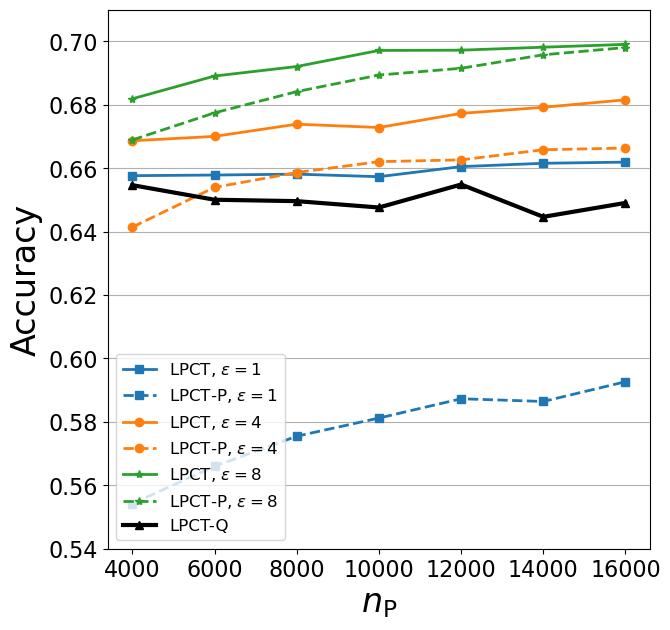

In [11]:



fig, ax = plt.subplots(figsize=(7,7))


# extract out the data for plot of LPCT-M, LPCT-M-P, LPCT-M-Q
x = [4000, 6000, 8000, 10000, 12000, 14000, 16000]
y = df_mean['accuracy'][(df_mean["epsilon"] == 1) * (df_mean["n_pub"] == 50) * (df_mean["method"] == "LDPTC-M")]
_ = plt.plot(x,y,linewidth=2, color = '#1f77b4', linestyle = "solid", label=r'LPCT, $\varepsilon = 1$',marker = "s")
y = df_mean['accuracy'][(df_mean["epsilon"] == 1) * (df_mean["n_pub"] == 50) * (df_mean["method"] == "LDPTC-M-P")]
_ = plt.plot(x,y,linewidth=2, color = '#1f77b4', linestyle = "dashed",label=r'LPCT-P, $\varepsilon = 1$',marker = "s")


# y = df_mean['accuracy'][(df_mean["epsilon"] == 2) * (df_mean["n_pub"] == 50) * (df_mean["method"] == "LDPTC-M")]
# _ = plt.plot(x,y,linewidth=2, color = '#ff7f0e', linestyle = "solid", label=r'$\varepsilon = 2$',marker = "v")
# y = df_mean['accuracy'][(df_mean["epsilon"] == 2) * (df_mean["n_pub"] == 50) * (df_mean["method"] == "LDPTC-M-P")]
# _ = plt.plot(x,y,linewidth=2, color = '#ff7f0e', linestyle = "dashed",label=r'$LPDT, \varepsilon = 2$',marker = "v")



y = df_mean['accuracy'][(df_mean["epsilon"] == 4) * (df_mean["n_pub"] == 50) * (df_mean["method"] == "LDPTC-M")]
_ = plt.plot(x,y,linewidth=2, color = '#ff7f0e', linestyle = "solid", label=r'LPCT, $\varepsilon = 4$',marker = "o")
y = df_mean['accuracy'][(df_mean["epsilon"] == 4) * (df_mean["n_pub"] == 50) * (df_mean["method"] == "LDPTC-M-P")]
_ = plt.plot(x,y,linewidth=2, color = '#ff7f0e', linestyle = "dashed",label=r'LPCT-P, $\varepsilon = 4$',marker = "o")


y = df_mean['accuracy'][(df_mean["epsilon"] == 8) * (df_mean["n_pub"] == 50) * (df_mean["method"] == "LDPTC-M")]
_ = plt.plot(x,y,linewidth=2, color = '#2ca02c', linestyle = "solid", label=r'LPCT, $\varepsilon = 8$',marker = "*")
y = df_mean['accuracy'][(df_mean["epsilon"] == 8) * (df_mean["n_pub"] == 50) * (df_mean["method"] == "LDPTC-M-P")]
_ = plt.plot(x,y,linewidth=2, color = '#2ca02c', linestyle = "dashed",label=r'LPCT-P, $\varepsilon = 8$',marker = "*")

y = df_mean['accuracy'][(df_mean["epsilon"] == 8) * (df_mean["n_pub"] == 50) * (df_mean["method"] == "LDPTC-M-Q")]
_ = plt.plot(x,y,linewidth=3, color = "black", linestyle = "solid",label=r'LPCT-Q',marker = "^")



_ = plt.ylabel("Accuracy", fontsize=24)
_ = plt.xlabel(r"$n_{\mathrm{P}}$", fontsize=24)
_ = plt.legend(fontsize = 12, loc = 3)
_ = plt.xticks(fontsize = 16)
_ = plt.yticks(fontsize = 16)
_ = plt.grid(axis = 'y')

_ = plt.ylim(0.54, 0.71)


plt.savefig("./results/plot/np-acc-comparison.pdf",bbox_inches="tight")

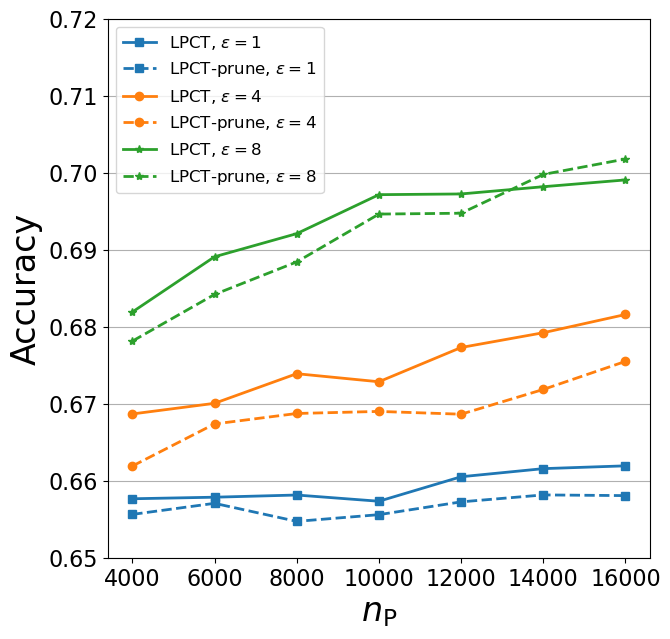

In [13]:



fig, ax = plt.subplots(figsize=(7,7))


# extract out the data for plot of LPCT-M, LPCT-M-P, LPCT-M-Q
x = [4000, 6000, 8000, 10000, 12000, 14000, 16000]
y = df_mean['accuracy'][(df_mean["epsilon"] == 1) * (df_mean["n_pub"] == 50) * (df_mean["method"] == "LDPTC-M")]
_ = plt.plot(x,y,linewidth=2, color = '#1f77b4', linestyle = "solid", label=r'LPCT, $\varepsilon = 1$',marker = "s")
y = df_mean_prune['accuracy'][(df_mean_prune["epsilon"] == 1) * (df_mean_prune["n_pub"] == 50) * (df_mean_prune["method"] == "LDPTC-M")]+0.002
_ = plt.plot(x,y,linewidth=2, color = '#1f77b4', linestyle = "dashed",label=r'LPCT-prune, $\varepsilon = 1$',marker = "s")


# y = df_mean['accuracy'][(df_mean["epsilon"] == 2) * (df_mean["n_pub"] == 50) * (df_mean["method"] == "LDPTC-M")]
# _ = plt.plot(x,y,linewidth=2, color = '#ff7f0e', linestyle = "solid", label=r'$\varepsilon = 2$',marker = "v")
# y = df_mean_prune['accuracy'][(df_mean_prune["epsilon"] == 2) * (df_mean_prune["n_pub"] == 50) * (df_mean_prune["method"] == "LDPTC-M")]
# _ = plt.plot(x,y,linewidth=2, color = '#ff7f0e', linestyle = "dashed",label=r'$LPDT, \varepsilon = 2$',marker = "v")



y = df_mean['accuracy'][(df_mean["epsilon"] == 4) * (df_mean["n_pub"] == 50) * (df_mean["method"] == "LDPTC-M")]
_ = plt.plot(x,y,linewidth=2, color = '#ff7f0e', linestyle = "solid", label=r'LPCT, $\varepsilon = 4$',marker = "o")
y = df_mean_prune['accuracy'][(df_mean_prune["epsilon"] == 4) * (df_mean_prune["n_pub"] == 50) * (df_mean_prune["method"] == "LDPTC-M")]+0.005
_ = plt.plot(x,y,linewidth=2, color = '#ff7f0e', linestyle = "dashed",label=r'LPCT-prune, $\varepsilon = 4$',marker = "o")


y = df_mean['accuracy'][(df_mean["epsilon"] == 8) * (df_mean["n_pub"] == 50) * (df_mean["method"] == "LDPTC-M")]
_ = plt.plot(x,y,linewidth=2, color = '#2ca02c', linestyle = "solid", label=r'LPCT, $\varepsilon = 8$',marker = "*")
y = df_mean_prune['accuracy'][(df_mean_prune["epsilon"] == 8) * (df_mean_prune["n_pub"] == 50) * (df_mean_prune["method"] == "LDPTC-M")] + 0.01
_ = plt.plot(x,y,linewidth=2, color = '#2ca02c', linestyle = "dashed",label=r'LPCT-prune, $\varepsilon = 8$',marker = "*")




_ = plt.ylabel("Accuracy", fontsize=24)
_ = plt.xlabel(r"$n_{\mathrm{P}}$", fontsize=24)
_ = plt.legend(fontsize = 12, loc = 2)
_ = plt.xticks(fontsize = 16)
_ = plt.yticks(fontsize = 16)
_ = plt.grid(axis = 'y')

_ = plt.ylim(0.65, 0.72)


plt.savefig("./results/plot/np-acc-prune.pdf",bbox_inches="tight")

# acc - nq

In [24]:

report_method = ["LDPTC-M", "LDPTC-M-P", "LDPTC-M-Q"]


all_log = pd.DataFrame([])
log_file_dir = "./results/nq_acc" 


for method in report_method:
    log = pd.read_csv("{}/{}.csv".format(log_file_dir,method), header=None)
    log.columns = "distribution_index,method,iterate,epsilon,n_train,n_pub,accuracy,bce,time_used,max_depth,min_samples_leaf,lamda".split(',')
    all_log = all_log.append(log)
    
    
filter_columns = ["distribution_index", "method", "epsilon", "n_train", "n_pub"]
unique_values_dict = {col: all_log[col].unique().tolist() for col in filter_columns}

unique_values_dict

values_to_filter = {
    "distribution_index": [4],
    "method": [
               "LDPTC-M", "LDPTC-M-P", "LDPTC-M-Q"
              ],
    "epsilon": [0.5, 1, 2, 4, 8, 1000],
    "n_train": [10000],
}

mask_list = [all_log[col].isin(values) for col, values in values_to_filter.items()]
combined_mask = mask_list[0]
for mask in mask_list[1:]:
    combined_mask = combined_mask & mask
filtered_log = all_log[combined_mask]
    
    
best_result_log = filtered_log.groupby(by=["distribution_index", "method", "epsilon", "n_train", "n_pub", "max_depth", "min_samples_leaf", "lamda"]).agg('mean').reset_index()
df_mean = best_result_log.groupby(by=["distribution_index", "method", "epsilon", "n_train", "n_pub"]).agg('max').reset_index()




# filtering out the results in values_to_filter
report_method = ["LDPTC-M"]
all_log = pd.DataFrame([])
log_file_dir = "./results/prune" 

for method in report_method:
    log = pd.read_csv("{}/{}.csv".format(log_file_dir,method), header=None)
    log.columns = "distribution_index,method,iterate,epsilon,n_train,n_pub,accuracy,bce,time_used,max_depth,min_depth,lamda".split(',')
    all_log = all_log.append(log)
    
values_to_filter = {
    "distribution_index": [4],
    "method": [
               "LDPTC-M",
              ],
    "epsilon": [0.5, 1, 2, 4, 8,1000],
    "n_train": [10000], 
}
mask_list = [all_log[col].isin(values) for col, values in values_to_filter.items()]
combined_mask = mask_list[0]
for mask in mask_list[1:]:
    combined_mask = combined_mask & mask
filtered_log = all_log[combined_mask]


best_result_log = filtered_log.groupby(by=["distribution_index", "method", "epsilon", "n_train", "n_pub", "max_depth", "min_depth", "lamda"]).agg('mean').reset_index()
df_mean_prune = best_result_log.groupby(by=["distribution_index", "method", "epsilon", "n_train", "n_pub"]).agg('max').reset_index()


/tmp/ipykernel_63454/721583732.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_log = all_log.append(log)
/tmp/ipykernel_63454/721583732.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_log = all_log.append(log)
/tmp/ipykernel_63454/721583732.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_log = all_log.append(log)


{'distribution_index': [4],
 'method': ['LDPTC-M', 'LDPTC-M-P', 'LDPTC-M-Q'],
 'epsilon': [0.5, 1.0, 2.0, 4.0, 8.0, 1000.0],
 'n_train': [10000],
 'n_pub': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 120, 140, 160, 180, 200]}

/tmp/ipykernel_63454/721583732.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_log = all_log.append(log)


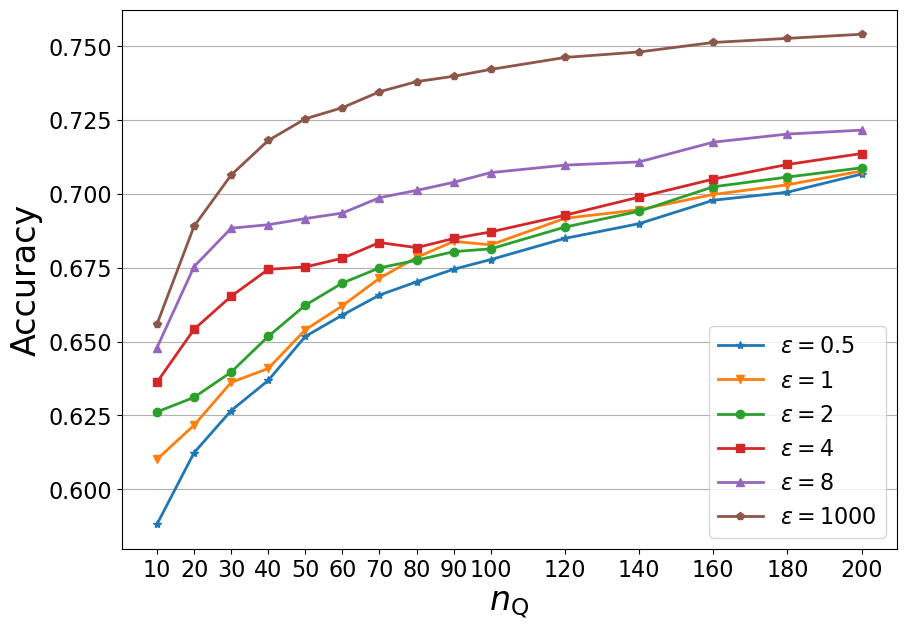

In [15]:



fig, ax = plt.subplots(figsize=(10,7))


# extract out the data for plot of LPCT-M, LPCT-M-P, LPCT-M-Q
x = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 120, 140, 160, 180, 200]
y = df_mean['accuracy'][(df_mean["epsilon"] == 0.5)  * (df_mean["method"] == "LDPTC-M")]
_ = plt.plot(x,y,linewidth=2,label=r'$\varepsilon = 0.5$',marker = "*")

y = df_mean['accuracy'][(df_mean["epsilon"] == 1)  * (df_mean["method"] == "LDPTC-M")]
_ = plt.plot(x,y,linewidth=2,label=r'$\varepsilon = 1$',marker = "v")

y = df_mean['accuracy'][(df_mean["epsilon"] == 2)  * (df_mean["method"] == "LDPTC-M")]
_ = plt.plot(x,y,linewidth=2,label=r'$\varepsilon = 2$',marker = "o")

y = df_mean['accuracy'][(df_mean["epsilon"] == 4)  * (df_mean["method"] == "LDPTC-M")]
_ = plt.plot(x,y,linewidth=2,label=r'$\varepsilon = 4$',marker = "s")

y = df_mean['accuracy'][(df_mean["epsilon"] == 8) * (df_mean["method"] == "LDPTC-M")]
_ = plt.plot(x,y,linewidth=2,label=r'$\varepsilon = 8$',marker = "^")

y = df_mean['accuracy'][(df_mean["epsilon"] == 1000) *  (df_mean["method"] == "LDPTC-M")] 
_ = plt.plot(x,y,linewidth=2,label=r'$\varepsilon = 1000$',marker = "p")

# y = df_mean['accuracy'][(df_mean["epsilon"] == 4) *  (df_mean["method"] == "LDPTC-M-P")]
# _ = plt.plot(x,y,linewidth=2,label=r'$LDPTC-P$',marker = "^")

# y = df_mean['accuracy'][(df_mean["epsilon"] == 4) *  (df_mean["method"] == "LDPTC-M-Q")]
# _ = plt.plot(x,y,linewidth=2,label=r'$LDPTC-Q$',marker = "^")


_ = plt.ylabel("Accuracy", fontsize=24)
_ = plt.xlabel(r"$n_{\mathrm{Q}}$", fontsize=24)
_ = plt.legend(fontsize = 16, loc = 4)
_ = plt.xticks(fontsize = 16)
_ = plt.yticks(fontsize = 16)
_ = plt.grid(axis = 'y')

_ = ax.set_xticks( [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 120, 140, 160, 180, 200])


plt.savefig("./results/plot/nq-acc.pdf",bbox_inches="tight")

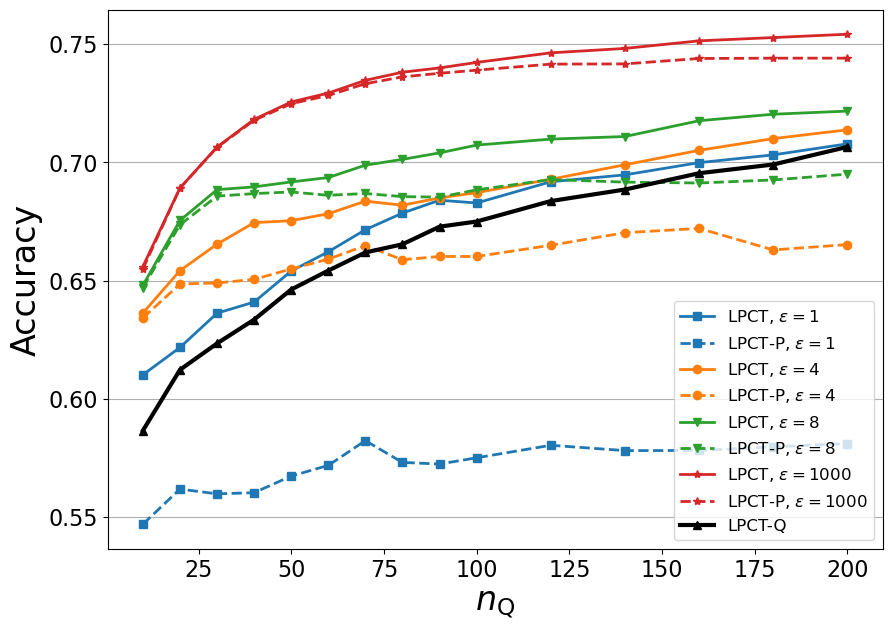

In [25]:



fig, ax = plt.subplots(figsize=(10,7))


# extract out the data for plot of LPCT-M, LPCT-M-P, LPCT-M-Q
x = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 120, 140, 160, 180, 200]
y = df_mean['accuracy'][(df_mean["epsilon"] == 1) * (df_mean["method"] == "LDPTC-M")]
_ = plt.plot(x,y,linewidth=2, color = '#1f77b4', linestyle = "solid", label=r'LPCT, $\varepsilon = 1$',marker = "s")
y = df_mean['accuracy'][(df_mean["epsilon"] == 1) * (df_mean["method"] == "LDPTC-M-P")]
_ = plt.plot(x,y,linewidth=2, color = '#1f77b4', linestyle = "dashed",label=r'LPCT-P, $\varepsilon = 1$',marker = "s")


# y = df_mean['accuracy'][(df_mean["epsilon"] == 2) * (df_mean["n_pub"] == 50) * (df_mean["method"] == "LDPTC-M")]
# _ = plt.plot(x,y,linewidth=2, color = '#ff7f0e', linestyle = "solid", label=r'$\varepsilon = 2$',marker = "v")
# y = df_mean['accuracy'][(df_mean["epsilon"] == 2) * (df_mean["n_pub"] == 50) * (df_mean["method"] == "LDPTC-M-P")]
# _ = plt.plot(x,y,linewidth=2, color = '#ff7f0e', linestyle = "dashed",label=r'$LPDT, \varepsilon = 2$',marker = "v")



y = df_mean['accuracy'][(df_mean["epsilon"] == 4) * (df_mean["method"] == "LDPTC-M")]
_ = plt.plot(x,y,linewidth=2, color = '#ff7f0e', linestyle = "solid", label=r'LPCT, $\varepsilon = 4$',marker = "o")
y = df_mean['accuracy'][(df_mean["epsilon"] == 4) * (df_mean["method"] == "LDPTC-M-P")]
_ = plt.plot(x,y,linewidth=2, color = '#ff7f0e', linestyle = "dashed",label=r'LPCT-P, $\varepsilon = 4$',marker = "o")


y = df_mean['accuracy'][(df_mean["epsilon"] == 8) * (df_mean["method"] == "LDPTC-M")]
_ = plt.plot(x,y,linewidth=2, color = '#2ca02c', linestyle = "solid", label=r'LPCT, $\varepsilon = 8$',marker = "v")
y = df_mean['accuracy'][(df_mean["epsilon"] == 8) * (df_mean["method"] == "LDPTC-M-P")]
_ = plt.plot(x,y,linewidth=2, color = '#2ca02c', linestyle = "dashed",label=r'LPCT-P, $\varepsilon = 8$',marker = "v")


y = df_mean['accuracy'][(df_mean["epsilon"] == 1000) * (df_mean["method"] == "LDPTC-M")]
_ = plt.plot(x,y,linewidth=2, color = '#d62728', linestyle = "solid", label=r'LPCT, $\varepsilon = 1000$',marker = "*")
y = df_mean['accuracy'][(df_mean["epsilon"] == 1000) * (df_mean["method"] == "LDPTC-M-P")]
_ = plt.plot(x,y,linewidth=2, color = '#d62728', linestyle = "dashed",label=r'LPCT-P, $\varepsilon = 1000$',marker = "*")


y = df_mean['accuracy'][(df_mean["epsilon"] == 8) * (df_mean["method"] == "LDPTC-M-Q")]
_ = plt.plot(x,y,linewidth=3, color = "black", linestyle = "solid",label=r'LPCT-Q',marker = "^")



_ = plt.ylabel("Accuracy", fontsize=24)
_ = plt.xlabel(r"$n_{\mathrm{Q}}$", fontsize=24)
_ = plt.legend(fontsize = 12, loc = 4)
_ = plt.xticks(fontsize = 16)
_ = plt.yticks(fontsize = 16)
_ = plt.grid(axis = 'y')

# _ = ax.set_xticks( [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 120, 140, 160, 180, 200])


plt.savefig("./results/plot/nq-acc-comparison.pdf",bbox_inches="tight")

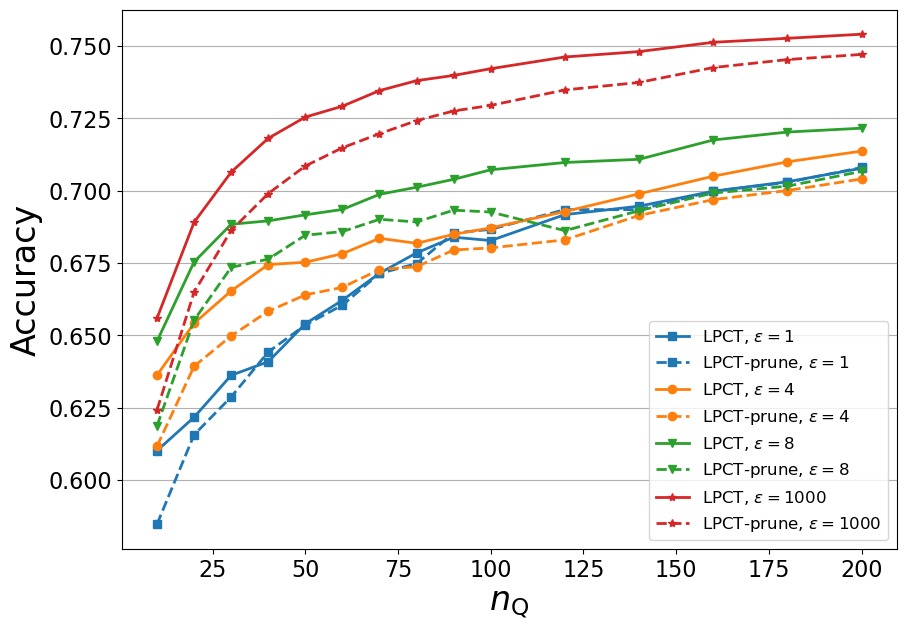

In [26]:



fig, ax = plt.subplots(figsize=(10,7))


# extract out the data for plot of LPCT-M, LPCT-M-P, LPCT-M-Q
x = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 120, 140, 160, 180, 200]
y = df_mean['accuracy'][(df_mean["epsilon"] == 1) * (df_mean["method"] == "LDPTC-M")]
_ = plt.plot(x,y,linewidth=2, color = '#1f77b4', linestyle = "solid", label=r'LPCT, $\varepsilon = 1$',marker = "s")
y = df_mean_prune['accuracy'][(df_mean_prune["epsilon"] == 1) * (df_mean_prune["method"] == "LDPTC-M")]
_ = plt.plot(x,y,linewidth=2, color = '#1f77b4', linestyle = "dashed",label=r'LPCT-prune, $\varepsilon = 1$',marker = "s")


# y = df_mean['accuracy'][(df_mean["epsilon"] == 2) * (df_mean["n_pub"] == 50) * (df_mean["method"] == "LDPTC-M")]
# _ = plt.plot(x,y,linewidth=2, color = '#ff7f0e', linestyle = "solid", label=r'$\varepsilon = 2$',marker = "v")
# y = df_mean['accuracy'][(df_mean["epsilon"] == 2) * (df_mean["n_pub"] == 50) * (df_mean["method"] == "LDPTC-M-P")]
# _ = plt.plot(x,y,linewidth=2, color = '#ff7f0e', linestyle = "dashed",label=r'$LPDT, \varepsilon = 2$',marker = "v")



y = df_mean['accuracy'][(df_mean["epsilon"] == 4) * (df_mean["method"] == "LDPTC-M")]
_ = plt.plot(x,y,linewidth=2, color = '#ff7f0e', linestyle = "solid", label=r'LPCT, $\varepsilon = 4$',marker = "o")
y = df_mean_prune['accuracy'][(df_mean_prune["epsilon"] == 4) * (df_mean_prune["method"] == "LDPTC-M")]
_ = plt.plot(x,y,linewidth=2, color = '#ff7f0e', linestyle = "dashed",label=r'LPCT-prune, $\varepsilon = 4$',marker = "o")


y = df_mean['accuracy'][(df_mean["epsilon"] == 8) * (df_mean["method"] == "LDPTC-M")]
_ = plt.plot(x,y,linewidth=2, color = '#2ca02c', linestyle = "solid", label=r'LPCT, $\varepsilon = 8$',marker = "v")
y = df_mean_prune['accuracy'][(df_mean_prune["epsilon"] == 8) * (df_mean_prune["method"] == "LDPTC-M")] 
_ = plt.plot(x,y,linewidth=2, color = '#2ca02c', linestyle = "dashed",label=r'LPCT-prune, $\varepsilon = 8$',marker = "v")


y = df_mean['accuracy'][(df_mean["epsilon"] == 1000) * (df_mean["method"] == "LDPTC-M")]
_ = plt.plot(x,y,linewidth=2, color = '#d62728', linestyle = "solid", label=r'LPCT, $\varepsilon = 1000$',marker = "*")
y = df_mean_prune['accuracy'][(df_mean_prune["epsilon"] == 1000) * (df_mean_prune["method"] == "LDPTC-M")]
_ = plt.plot(x,y,linewidth=2, color = '#d62728', linestyle = "dashed",label=r'LPCT-prune, $\varepsilon = 1000$',marker = "*")


_ = plt.ylabel("Accuracy", fontsize=24)
_ = plt.xlabel(r"$n_{\mathrm{Q}}$", fontsize=24)
_ = plt.legend(fontsize = 12, loc = 4)
_ = plt.xticks(fontsize = 16)
_ = plt.yticks(fontsize = 16)
_ = plt.grid(axis = 'y')

# _ = ax.set_xticks( [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 120, 140, 160, 180, 200])


plt.savefig("./results/plot/nq-acc-prune.pdf",bbox_inches="tight")

# acc - lamda

In [470]:
# filtering out the results in values_to_filter
report_method = ["LDPTC-M", "LDPTC-M-P", "LDPTC-M-Q"]
all_log = pd.DataFrame([])
log_file_dir = "./results/epsilon_acc" 

for method in report_method:
    log = pd.read_csv("{}/{}.csv".format(log_file_dir,method), header=None)
    log.columns = "distribution_index,method,iterate,epsilon,n_train,n_pub,accuracy,bce,time_used,max_depth,min_samples_leaf,lamda".split(',')
    all_log = all_log.append(log)
    
values_to_filter = {
    "distribution_index": [4,5],
    "method": [
               "LDPTC-M",
              ],
    "epsilon": [0.5, 1, 2, 4, 8, 1000],
    "n_train": [10000],
    "n_pub": [1000, 50], 
}
mask_list = [all_log[col].isin(values) for col, values in values_to_filter.items()]
combined_mask = mask_list[0]
for mask in mask_list[1:]:
    combined_mask = combined_mask & mask
filtered_log = all_log[combined_mask]


best_result_log = filtered_log.groupby(by=["distribution_index", "method", "epsilon", "n_train", "n_pub", "max_depth", "min_samples_leaf", "lamda"]).agg('mean').reset_index()
df_mean = best_result_log.groupby(by=["distribution_index", "method", "epsilon", "n_train", "n_pub", "lamda"]).agg('max').reset_index()

df_mean = df_mean[(df_mean["lamda"] >= 0.5) * (df_mean["lamda"] <= 1000)]


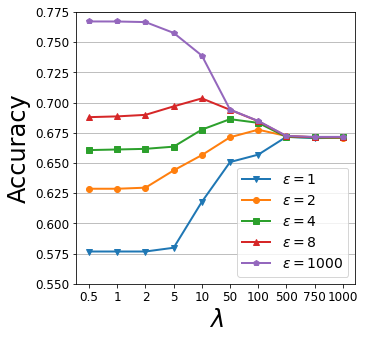

In [471]:

fig, ax = plt.subplots(figsize=(5,5))


# extract out the data for plot of LPCT-M, LPCT-M-P, LPCT-M-Q
x = [i for i in range(10)]

y = df_mean['accuracy'][(df_mean["epsilon"] == 1) * (df_mean["n_pub"] == 1000)]
_ = plt.plot(x,y,linewidth=2,label=r'$\varepsilon = 1$',marker = "v")

y = df_mean['accuracy'][(df_mean["epsilon"] == 2) * (df_mean["n_pub"] == 1000)]
_ = plt.plot(x,y,linewidth=2,label=r'$\varepsilon = 2$',marker = "o")

y = df_mean['accuracy'][(df_mean["epsilon"] == 4) * (df_mean["n_pub"] == 1000)]
_ = plt.plot(x,y,linewidth=2,label=r'$\varepsilon = 4$',marker = "s")

y = df_mean['accuracy'][(df_mean["epsilon"] == 8) * (df_mean["n_pub"] == 1000)]
_ = plt.plot(x,y,linewidth=2,label=r'$\varepsilon = 8$',marker = "^")

y = df_mean['accuracy'][(df_mean["epsilon"] == 1000) * (df_mean["n_pub"] == 1000)]
_ = plt.plot(x,y,linewidth=2,label=r'$\varepsilon = 1000$',marker = "p")





_ = plt.ylabel("Accuracy", fontsize=24)
_ = plt.xlabel(r"$\lambda$", fontsize=24)
_ = plt.legend(fontsize = 14, loc = 4)
_ = plt.xticks(fontsize = 12)
_ = plt.yticks(fontsize = 12)
_ = plt.grid(axis = 'y')

lamda_vec = [0.5, 1, 2, 5, 10, 50, 100, 500, 750, 1000]

_ = plt.ylim(0.55, 0.775)
_ = ax.set_xticks( x, lamda_vec)
plt.savefig("./results/plot/lamda-acc.pdf",bbox_inches="tight")

# acc - p

In [21]:
# filtering out the results in values_to_filter
report_method = ["LDPTC-M"]
all_log = pd.DataFrame([])
log_file_dir = "./results/depth" 

for method in report_method:
    log = pd.read_csv("{}/{}.csv".format(log_file_dir,method), header=None)
    log.columns = "distribution_index,method,iterate,epsilon,n_train,n_pub,accuracy,bce,time_used,max_depth,min_samples_leaf,lamda".split(',')
    all_log = all_log.append(log)
    
values_to_filter = {
    "distribution_index": [4],
    "method": [
               "LDPTC-M",
              ],
    "epsilon": [0.5, 1, 2, 4, 8, 1000],
    "n_train": [10000],
    "n_pub": [100], 
}
mask_list = [all_log[col].isin(values) for col, values in values_to_filter.items()]
combined_mask = mask_list[0]
for mask in mask_list[1:]:
    combined_mask = combined_mask & mask
filtered_log = all_log[combined_mask]


best_result_log = filtered_log.groupby(by=["distribution_index", "method", "epsilon", "n_train", "n_pub", "max_depth", "min_samples_leaf", "lamda"]).agg('mean').reset_index()
df_mean = best_result_log.groupby(by=["distribution_index", "method", "epsilon", "n_train", "n_pub", "max_depth"]).agg('max').reset_index()
df_mean = df_mean[df_mean["max_depth"] < 8]

/tmp/ipykernel_63454/319540102.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_log = all_log.append(log)


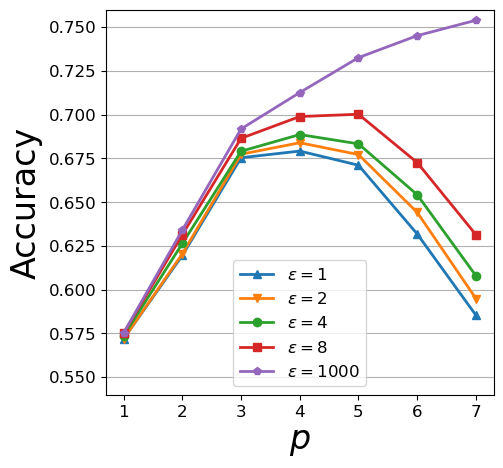

In [22]:

fig, ax = plt.subplots(figsize=(5,5))


# extract out the data for plot of LPCT-M, LPCT-M-P, LPCT-M-Q
x = [i + 1 for i in range(7)]

y = df_mean['accuracy'][(df_mean["epsilon"] == 1) ]
_ = plt.plot(x,y,linewidth=2,label=r'$\varepsilon = 1$',marker = "^")

y = df_mean['accuracy'][(df_mean["epsilon"] == 2) ]
_ = plt.plot(x,y,linewidth=2,label=r'$\varepsilon = 2$',marker = "v")

y = df_mean['accuracy'][(df_mean["epsilon"] == 4)]
_ = plt.plot(x,y,linewidth=2,label=r'$\varepsilon = 4$',marker = "o")

y = df_mean['accuracy'][(df_mean["epsilon"] == 8) ]
_ = plt.plot(x,y,linewidth=2,label=r'$\varepsilon = 8$',marker = "s")

y = df_mean['accuracy'][(df_mean["epsilon"] == 1000) ]
_ = plt.plot(x,y,linewidth=2,label=r'$\varepsilon = 1000$',marker = "p")





_ = plt.ylabel("Accuracy", fontsize=24)
_ = plt.xlabel(r"$p$", fontsize=24)
_ = plt.legend(fontsize = 12, loc =8)
_ = plt.xticks(fontsize = 12)
_ = plt.yticks(fontsize = 12)
_ = plt.grid(axis = 'y')

_ = plt.ylim(0.54, 0.76)
_ = ax.set_xticks( x)
plt.savefig("./results/plot/p-acc.pdf",bbox_inches="tight")

In [27]:


# filtering out the results in values_to_filter
report_method = ["LDPTC-M-prune"]
all_log = pd.DataFrame([])
log_file_dir = "./results/depth" 

for method in report_method:
    log = pd.read_csv("{}/{}.csv".format(log_file_dir,method), header=None)
    log.columns = "distribution_index,method,iterate,epsilon,n_train,n_pub,accuracy,bce,time_used,max_depth,min_samples_leaf,min_depth".split(',')
    all_log = all_log.append(log)
    
values_to_filter = {
    "distribution_index": [4],
    "method": [
               "LDPTC-M-prune",
              ],
    "epsilon": [0.5, 1, 2, 4, 8,1000],
    "n_pub": [100], 
}
mask_list = [all_log[col].isin(values) for col, values in values_to_filter.items()]
combined_mask = mask_list[0]
for mask in mask_list[1:]:
    combined_mask = combined_mask & mask
filtered_log = all_log[combined_mask]


best_result_log = filtered_log.groupby(by=["distribution_index", "method", "epsilon", "n_train", "n_pub", "max_depth", "min_depth", "min_samples_leaf"]).agg('mean').reset_index()
df_mean_prune = best_result_log.groupby(by=["distribution_index", "method", "epsilon", "n_train", "n_pub", "max_depth"]).agg('max').reset_index()
df_mean_prune = df_mean_prune[df_mean_prune["max_depth"] < 8]

/tmp/ipykernel_63454/2815469649.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_log = all_log.append(log)


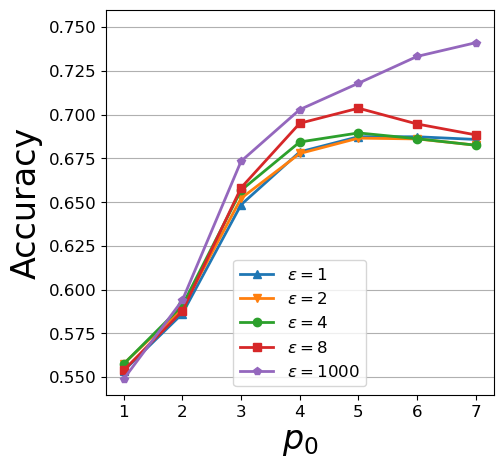

In [30]:

fig, ax = plt.subplots(figsize=(5,5))


# extract out the data for plot of LPCT-M, LPCT-M-P, LPCT-M-Q
x = [i + 1 for i in range(7)]

y = df_mean_prune['accuracy'][(df_mean_prune["epsilon"] == 1) ]
_ = plt.plot(x,y,linewidth=2,label=r'$\varepsilon = 1$',marker = "^")

y = df_mean_prune['accuracy'][(df_mean_prune["epsilon"] == 2) ]
_ = plt.plot(x,y,linewidth=2,label=r'$\varepsilon = 2$',marker = "v")

y = df_mean_prune['accuracy'][(df_mean_prune["epsilon"] == 4) ]
_ = plt.plot(x,y,linewidth=2,label=r'$\varepsilon = 4$',marker = "o")

y = df_mean_prune['accuracy'][(df_mean_prune["epsilon"] == 8) ]
_ = plt.plot(x,y,linewidth=2,label=r'$\varepsilon = 8$',marker = "s")

y = df_mean_prune['accuracy'][(df_mean_prune["epsilon"] == 1000) ]
_ = plt.plot(x,y,linewidth=2,label=r'$\varepsilon = 1000$',marker = "p")





_ = plt.ylabel("Accuracy", fontsize=24)
_ = plt.xlabel(r"$p_0$", fontsize=24)
_ = plt.legend(fontsize = 12,loc = 8)
_ = plt.xticks(fontsize = 12)
_ = plt.yticks(fontsize = 12)
_ = plt.grid(axis = 'y')

_ = plt.ylim(0.54, 0.76)
_ = ax.set_xticks( x)
plt.savefig("./results/plot/p-acc_prune.pdf",bbox_inches="tight")

# range

In [15]:

report_method = ["known", "public", "unknown"]


all_log = pd.DataFrame([])
log_file_dir = "./results/range" 


for method in report_method:
    log = pd.read_csv("{}/{}.csv".format(log_file_dir,method), header=None)
    log.columns = "distribution_index,method,iterate,epsilon,n_train,n_pub,accuracy,bce,time_used,max_depth,min_samples_leaf,lamda,range".split(',')
    all_log = all_log.append(log)
    
    
filter_columns = ["distribution_index", "method", "epsilon", "n_train", "n_pub"]
unique_values_dict = {col: all_log[col].unique().tolist() for col in filter_columns}

unique_values_dict

values_to_filter = {
    "distribution_index": [4],
    "method": [
               "known", "unknown", "public"
              ],
    "epsilon": [0.5, 1, 2, 4, 8, 1000],
    "n_train": [10000],
}

mask_list = [all_log[col].isin(values) for col, values in values_to_filter.items()]
combined_mask = mask_list[0]
for mask in mask_list[1:]:
    combined_mask = combined_mask & mask
filtered_log = all_log[combined_mask]
    
    
best_result_log = filtered_log.groupby(by=["distribution_index", "method", "epsilon", "n_train", "n_pub", "max_depth", "min_samples_leaf", "lamda", "range"]).agg('mean').reset_index()
df_mean = best_result_log.groupby(by=["distribution_index", "method", "epsilon", "n_train", "n_pub"]).agg('max').reset_index()


/tmp/ipykernel_50182/4284470336.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_log = all_log.append(log)
/tmp/ipykernel_50182/4284470336.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_log = all_log.append(log)
/tmp/ipykernel_50182/4284470336.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_log = all_log.append(log)


{'distribution_index': [4],
 'method': ['known', 'public', 'unknown'],
 'epsilon': [0.5, 1.0, 2.0, 8.0, 1000.0],
 'n_train': [10000],
 'n_pub': [20, 40, 60, 80, 100, 120, 140, 160]}

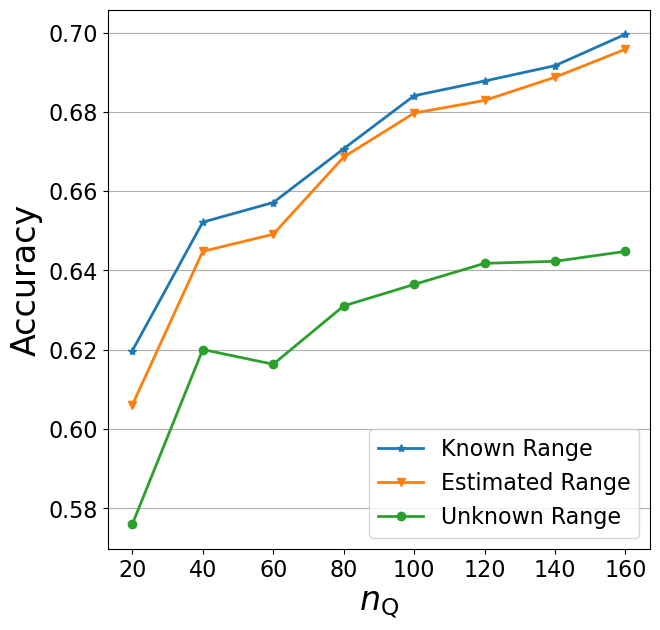

In [16]:



fig, ax = plt.subplots(figsize=(7,7))
epsilon = 0.5

# extract out the data for plot of LPCT-M, LPCT-M-P, LPCT-M-Q
x = [20,40,60,80,100,120,140,160]
y = df_mean['accuracy'][(df_mean["epsilon"] == epsilon)  * (df_mean["method"] == "known")]
_ = plt.plot(x,y,linewidth=2,label= 'Known Range'.format(epsilon),marker = "*")

y = df_mean['accuracy'][(df_mean["epsilon"] == epsilon)  * (df_mean["method"] == "public")]
_ = plt.plot(x,y,linewidth=2,label= 'Estimated Range'.format(epsilon),marker = "v")

y = df_mean['accuracy'][(df_mean["epsilon"] == epsilon)  * (df_mean["method"] == "unknown")]
_ = plt.plot(x,y,linewidth=2,label= 'Unknown Range'.format(epsilon),marker = "o")

_ = plt.ylabel("Accuracy", fontsize=24)
_ = plt.xlabel(r"$n_{\mathrm{Q}}$", fontsize=24)
_ = plt.legend(fontsize = 16, loc = 4)
_ = plt.xticks(fontsize = 16)
_ = plt.yticks(fontsize = 16)
_ = plt.grid(axis = 'y')

_ = ax.set_xticks( x )


plt.savefig("./results/plot/range-1.pdf",bbox_inches="tight")

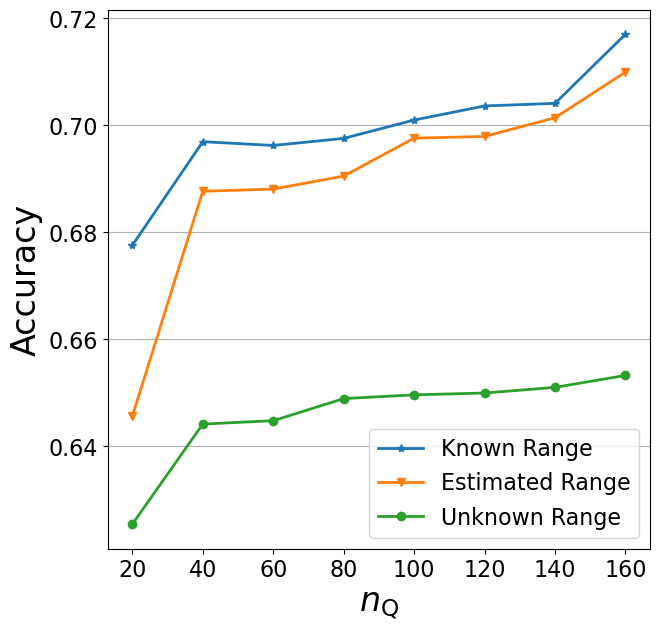

In [17]:



fig, ax = plt.subplots(figsize=(7,7))
epsilon = 8

# extract out the data for plot of LPCT-M, LPCT-M-P, LPCT-M-Q
x = [20,40,60,80,100,120,140,160]
y = df_mean['accuracy'][(df_mean["epsilon"] == epsilon)  * (df_mean["method"] == "known")]
_ = plt.plot(x,y,linewidth=2,label= 'Known Range'.format(epsilon),marker = "*")

y = df_mean['accuracy'][(df_mean["epsilon"] == epsilon)  * (df_mean["method"] == "public")]
_ = plt.plot(x,y,linewidth=2,label= 'Estimated Range'.format(epsilon),marker = "v")

y = df_mean['accuracy'][(df_mean["epsilon"] == epsilon)  * (df_mean["method"] == "unknown")]
_ = plt.plot(x,y,linewidth=2,label= 'Unknown Range'.format(epsilon),marker = "o")

_ = plt.ylabel("Accuracy", fontsize=24)
_ = plt.xlabel(r"$n_{\mathrm{Q}}$", fontsize=24)
_ = plt.legend(fontsize = 16, loc = 4)
_ = plt.xticks(fontsize = 16)
_ = plt.yticks(fontsize = 16)
_ = plt.grid(axis = 'y')

_ = ax.set_xticks( x )


plt.savefig("./results/plot/range-2.pdf",bbox_inches="tight")

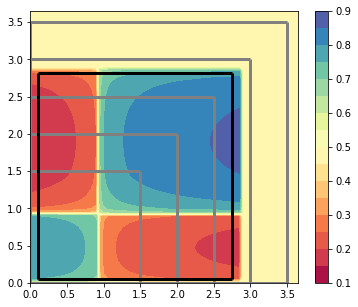

In [67]:
distribution = TransferDistribution(4).returnDistribution()

fig, ax = plt.subplots(figsize=(6,5))


axis0,axis1 = np.meshgrid(np.arange(0,3.7,0.05),np.arange(0,3.7,0.05))
X_grid = np.array([axis0.ravel(),axis1.ravel()]).T
y, _ = distribution.evaluate(X_P =0.35 * X_grid)
y = y.reshape(-1,axis1.shape[0])

cfplot = plt.contourf(axis0, axis1, y ,cmap = plt.cm.Spectral, levels = [0.05 * i + 0.1 for i in range(17)])
cbar = plt.colorbar(cfplot)


grid = 1.5
_ = plt.hlines(0, 0, grid, colors = "grey", linewidth = 3)
_ = plt.hlines(grid, 0, grid, colors = "grey", linewidth = 3)
_ = plt.vlines(0, 0, grid, colors = "grey", linewidth = 3)
_ = plt.vlines(grid, 0, grid, colors = "grey", linewidth = 3)

grid = 2
_ = plt.hlines(0, 0, grid, colors = "grey", linewidth = 3)
_ = plt.hlines(grid, 0, grid, colors = "grey", linewidth = 3)
_ = plt.vlines(0, 0, grid, colors = "grey", linewidth = 3)
_ = plt.vlines(grid, 0, grid, colors = "grey", linewidth = 3)

grid = 2.5
_ = plt.hlines(0, 0, grid, colors = "grey", linewidth = 3)
_ = plt.hlines(grid, 0, grid, colors = "grey", linewidth = 3)
_ = plt.vlines(0, 0, grid, colors = "grey", linewidth = 3)
_ = plt.vlines(grid, 0, grid, colors = "grey", linewidth = 3)

grid = 3
_ = plt.hlines(0, 0, grid, colors = "grey", linewidth = 3)
_ = plt.hlines(grid, 0, grid, colors = "grey", linewidth = 3)
_ = plt.vlines(0, 0, grid, colors = "grey", linewidth = 3)
_ = plt.vlines(grid, 0, grid, colors = "grey", linewidth = 3)


grid = 3.5
_ = plt.hlines(0, 0, grid, colors = "grey", linewidth = 3)
_ = plt.hlines(grid, 0, grid, colors = "grey", linewidth = 3)
_ = plt.vlines(0, 0, grid, colors = "grey", linewidth = 3)
_ = plt.vlines(grid, 0, grid, colors = "grey", linewidth = 3)

_ = plt.hlines(0.05, 0.1, 2.75, colors = "black", linewidth = 3)
_ = plt.hlines(2.82, 0.1, 2.75, colors = "black", linewidth = 3)
_ = plt.vlines(0.1, 0.05, 2.82, colors = "black", linewidth = 3)
_ = plt.vlines(2.75, 0.05, 2.82, colors = "black", linewidth = 3)


_ = ax.set_xticks( [0,0.5,1,1.5,2, 2.5, 3, 3.5] )
_ = ax.set_yticks( [0,0.5,1,1.5,2, 2.5, 3, 3.5] )

plt.savefig("./results/plot/range_illustration.pdf",bbox_inches="tight")

# Partition

In [18]:

report_method = ["LDPTC-M", "LDPTC-M-P", "LDPTC-M-Q"]


all_log = pd.DataFrame([])
log_file_dir = "./results/nq_acc" 


for method in report_method:
    log = pd.read_csv("{}/{}.csv".format(log_file_dir,method), header=None)
    log.columns = "distribution_index,method,iterate,epsilon,n_train,n_pub,accuracy,bce,time_used,max_depth,min_samples_leaf,lamda".split(',')
    all_log = all_log.append(log)
    
    
filter_columns = ["distribution_index", "method", "epsilon", "n_train", "n_pub"]
unique_values_dict = {col: all_log[col].unique().tolist() for col in filter_columns}

unique_values_dict

values_to_filter = {
    "distribution_index": [4],
    "method": [
               "LDPTC-M", "LDPTC-M-P", "LDPTC-M-Q"
              ],
    "epsilon": [0.5, 1, 2, 4, 8, 1000],
    "n_train": [10000],
}

mask_list = [all_log[col].isin(values) for col, values in values_to_filter.items()]
combined_mask = mask_list[0]
for mask in mask_list[1:]:
    combined_mask = combined_mask & mask
filtered_log = all_log[combined_mask]
    
    
best_result_log = filtered_log.groupby(by=["distribution_index", "method", "epsilon", "n_train", "n_pub", "max_depth", "min_samples_leaf", "lamda"]).agg('mean').reset_index()
df_mean = best_result_log.groupby(by=["distribution_index", "method", "epsilon", "n_train", "n_pub"]).agg('max').reset_index()


/tmp/ipykernel_50182/237299618.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_log = all_log.append(log)
/tmp/ipykernel_50182/237299618.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_log = all_log.append(log)
/tmp/ipykernel_50182/237299618.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_log = all_log.append(log)


{'distribution_index': [4],
 'method': ['LDPTC-M', 'LDPTC-M-P', 'LDPTC-M-Q'],
 'epsilon': [0.5, 1.0, 2.0, 4.0, 8.0, 1000.0],
 'n_train': [10000],
 'n_pub': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 120, 140, 160, 180, 200]}

In [19]:
report_method = ["LDPTC-R"]
log_file_dir = "./results/partition" 
all_log = pd.DataFrame([])

for method in report_method:
    log = pd.read_csv("{}/{}.csv".format(log_file_dir,method), header=None)
    log.columns = "distribution_index,method,iterate,epsilon,n_train,n_pub,accuracy,bce,time_used,max_depth,min_samples_leaf,lamda".split(',')
    all_log = all_log.append(log)
    
    
    
values_to_filter = {
    "distribution_index": [4],
    "method": [
               "LDPTC-R",
              ],
    "epsilon": [0.5, 1, 2, 4, 8, 1000],
    "n_train": [10000],
    "max_depth":[1,2,3,4]
}
mask_list = [all_log[col].isin(values) for col, values in values_to_filter.items()]
combined_mask = mask_list[0]
for mask in mask_list[1:]:
    combined_mask = combined_mask & mask
filtered_log = all_log[combined_mask]


filter_columns = ["distribution_index", "method", "epsilon", "n_train", "n_pub"]
unique_values_dict = {col: all_log[col].unique().tolist() for col in filter_columns}
unique_values_dict

best_result_log = filtered_log.groupby(by=["distribution_index", "method", "epsilon", "n_train", "n_pub", "max_depth", "min_samples_leaf", "lamda"]).agg('mean').reset_index()
df_mean_random = best_result_log.groupby(by=["distribution_index", "method", "epsilon", "n_train", "n_pub"]).agg('max').reset_index()



/tmp/ipykernel_50182/1866841806.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_log = all_log.append(log)


{'distribution_index': [4],
 'method': ['LDPTC-R'],
 'epsilon': [0.5, 1.0, 2.0, 4.0, 8.0, 1000.0],
 'n_train': [4000, 6000, 8000, 10000, 12000, 14000, 16000],
 'n_pub': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 120, 140, 160, 180, 200]}

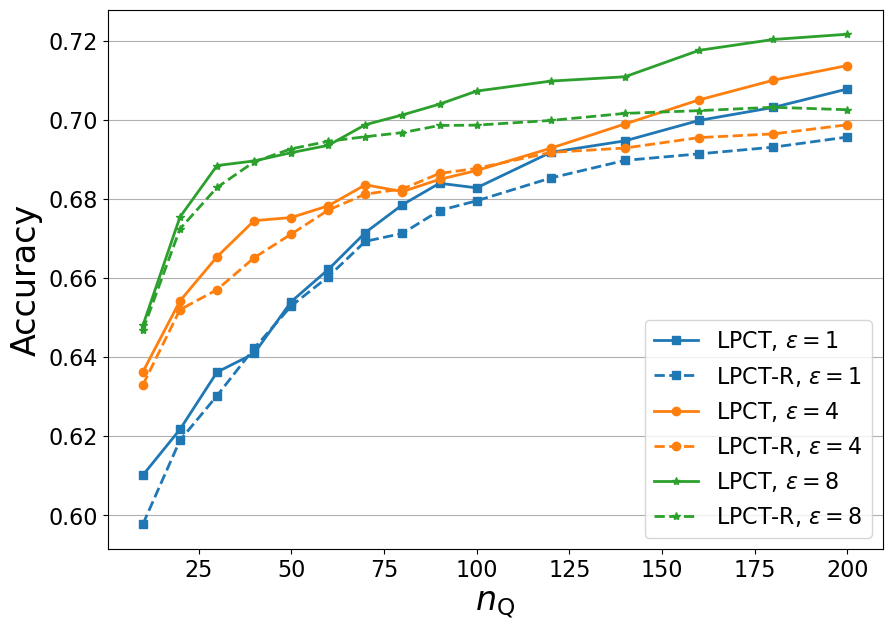

In [21]:



fig, ax = plt.subplots(figsize=(10,7))


# extract out the data for plot of LPCT-M, LPCT-M-P, LPCT-M-Q
x = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 120, 140, 160, 180, 200]
y = df_mean['accuracy'][(df_mean["epsilon"] == 1) * (df_mean["method"] == "LDPTC-M")]
_ = plt.plot(x,y,linewidth=2, color = '#1f77b4', linestyle = "solid", label=r'LPCT, $\varepsilon = 1$',marker = "s")
y = df_mean_random['accuracy'][(df_mean_random["epsilon"] == 1) * (df_mean_random["method"] == "LDPTC-R")]
_ = plt.plot(x,y,linewidth=2, color = '#1f77b4', linestyle = "dashed",label=r'LPCT-R, $\varepsilon = 1$',marker = "s")


# y = df_mean['accuracy'][(df_mean["epsilon"] == 0.5)  * (df_mean["method"] == "LDPTC-M")]
# _ = plt.plot(x,y,linewidth=2, color = '#ff7f0e', linestyle = "solid", label=r'$\varepsilon = 2$',marker = "v")
# y = df_mean_random['accuracy'][(df_mean_random["epsilon"] == 0.5) * (df_mean_random["method"] == "LDPTC-R")]
# _ = plt.plot(x,y,linewidth=2, color = '#ff7f0e', linestyle = "dashed",label=r'$LPDT, \varepsilon = 2$',marker = "v")



y = df_mean['accuracy'][(df_mean["epsilon"] == 4) * (df_mean["method"] == "LDPTC-M")]
_ = plt.plot(x,y,linewidth=2, color = '#ff7f0e', linestyle = "solid", label=r'LPCT, $\varepsilon = 4$',marker = "o")
y = df_mean_random['accuracy'][(df_mean_random["epsilon"] == 4) * (df_mean_random["method"] == "LDPTC-R")]
_ = plt.plot(x,y,linewidth=2, color = '#ff7f0e', linestyle = "dashed",label=r'LPCT-R, $\varepsilon = 4$',marker = "o")


y = df_mean['accuracy'][(df_mean["epsilon"] == 8) * (df_mean["method"] == "LDPTC-M")]
_ = plt.plot(x,y,linewidth=2, color = '#2ca02c', linestyle = "solid", label=r'LPCT, $\varepsilon = 8$',marker = "*")
y = df_mean_random['accuracy'][(df_mean_random["epsilon"] == 8) * (df_mean_random["method"] == "LDPTC-R")]
_ = plt.plot(x,y,linewidth=2, color = '#2ca02c', linestyle = "dashed",label=r'LPCT-R, $\varepsilon = 8$',marker = "*")




_ = plt.ylabel("Accuracy", fontsize=24)
_ = plt.xlabel(r"$n_{\mathrm{Q}}$", fontsize=24)
_ = plt.legend(fontsize = 16, loc = 4)
_ = plt.xticks(fontsize = 16)
_ = plt.yticks(fontsize = 16)
_ = plt.grid(axis = 'y')

# _ = ax.set_xticks( [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 120, 140, 160, 180, 200])


plt.savefig("./results/plot/random_partition.pdf",bbox_inches="tight")

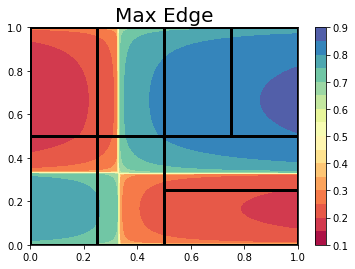

In [101]:
distribution = TransferDistribution(4).returnDistribution()


axis0,axis1 = np.meshgrid(np.arange(0,1,0.005),np.arange(0,1,0.005))
X_grid = np.array([axis0.ravel(),axis1.ravel()]).T
y, _ = distribution.evaluate(X_P = X_grid)
y = y.reshape(-1,axis1.shape[0])

cfplot = plt.contourf(axis0, axis1, y ,cmap = plt.cm.Spectral, levels = [0.05 * i + 0.1 for i in range(17)])
cbar = plt.colorbar(cfplot)


linewidth = 3
colors = "black"
# first layer
_ = plt.hlines(0, 0, 1, colors = colors, linewidth = linewidth)
_ = plt.hlines(1, 0, 1, colors = colors, linewidth = linewidth)
_ = plt.vlines(0, 0, 1, colors = colors, linewidth = linewidth)
_ = plt.vlines(1, 0, 1, colors = colors, linewidth = linewidth)

# second layer
_ = plt.vlines(0.5, 0, 1, colors = colors, linewidth = linewidth)
_ = plt.hlines(0.5, 0, 1, colors = colors, linewidth = linewidth)

# third layer
_ = plt.vlines(0.25, 0, 0.5, colors = colors, linewidth = linewidth)
_ = plt.vlines(0.25, 0.5, 1, colors = colors, linewidth = linewidth)
_ = plt.hlines(0.25, 0.5, 1, colors = colors, linewidth = linewidth)
_ = plt.vlines(0.75, 0.5, 1, colors = colors, linewidth = linewidth)

_ = plt.xlim(0,1)
_ = plt.ylim(0,1)

_ = plt.title("Max Edge", fontsize = 20)



plt.savefig("./results/plot/random_partition_illustration-1.pdf",bbox_inches="tight")

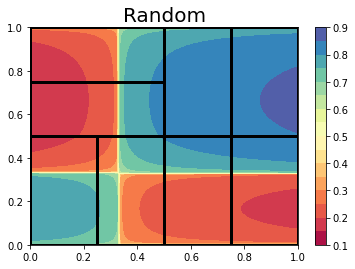

In [102]:
distribution = TransferDistribution(4).returnDistribution()


axis0,axis1 = np.meshgrid(np.arange(0,1,0.005),np.arange(0,1,0.005))
X_grid = np.array([axis0.ravel(),axis1.ravel()]).T
y, _ = distribution.evaluate(X_P = X_grid)
y = y.reshape(-1,axis1.shape[0])

cfplot = plt.contourf(axis0, axis1, y ,cmap = plt.cm.Spectral, levels = [0.05 * i + 0.1 for i in range(17)])
cbar = plt.colorbar(cfplot)


linewidth = 3
colors = "black"
# first layer
_ = plt.hlines(0, 0, 1, colors = colors, linewidth = linewidth)
_ = plt.hlines(1, 0, 1, colors = colors, linewidth = linewidth)
_ = plt.vlines(0, 0, 1, colors = colors, linewidth = linewidth)
_ = plt.vlines(1, 0, 1, colors = colors, linewidth = linewidth)

# second layer
_ = plt.vlines(0.5, 0, 1, colors = colors, linewidth = linewidth)
_ = plt.hlines(0.5, 0, 1, colors = colors, linewidth = linewidth)

# third layer
_ = plt.vlines(0.25, 0, 0.5, colors = colors, linewidth = linewidth)
_ = plt.hlines(0.75, 0, 0.5, colors = colors, linewidth = linewidth)
_ = plt.vlines(0.75, 0, 0.5, colors = colors, linewidth = linewidth)
_ = plt.vlines(0.75, 0.5, 1, colors = colors, linewidth = linewidth)

_ = plt.xlim(0,1)
_ = plt.ylim(0,1)

_ = plt.title("Random", fontsize = 20)

plt.savefig("./results/plot/random_partition_illustration-2.pdf",bbox_inches="tight")

# Realdata

# np - nq

In [2]:

report_method = ["LPCT-M", "LDPHIST", "LPCT-original"]


all_log = pd.DataFrame([])
log_file_dir = "./results/npnq" 


for method in report_method:
    log = pd.read_csv("{}/{}.csv".format(log_file_dir,method), header=None)
    log.columns = "dataname,method,iterate,epsilon,n_train,n_pub,accuracy,bce,delta,max_depth,min_samples_leaf,lamda".split(',')
    all_log = all_log.append(log)
    
    
filter_columns = ["dataname", "method", "epsilon", "n_train", "n_pub", "delta"]
unique_values_dict = {col: all_log[col].unique().tolist() for col in filter_columns}

# unique_values_dict

values_to_filter = {
    "dataname": ["diabetes"],
    "method": [
               "LPCT-M", "LDPHIST", "LPCT-original"
              ],
    "epsilon": [0.5, 1, 2, 4, 8, 1000],
    "lamda": [0,1,2,5],
    "n_pub": [80,200]
}

mask_list = [all_log[col].isin(values) for col, values in values_to_filter.items()]
combined_mask = mask_list[0]
for mask in mask_list[1:]:
    combined_mask = combined_mask & mask
filtered_log = all_log[combined_mask]
    
    
best_result_log = filtered_log.groupby(by=["dataname", "method", "epsilon", "delta", "max_depth", "min_samples_leaf", "lamda"]).agg('mean').reset_index()
df_mean = best_result_log.groupby(by=["dataname", "method", "epsilon", "delta"]).agg('max').reset_index()




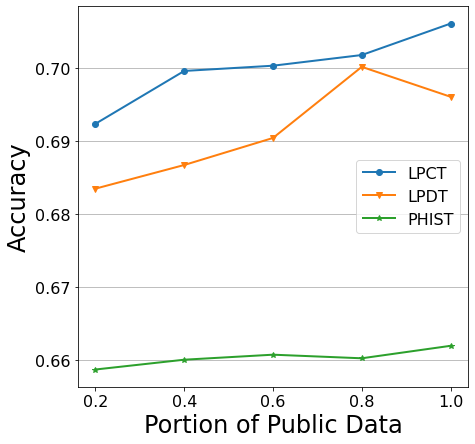

In [3]:



fig, ax = plt.subplots(figsize=(7,7))
epsilon = 8


x = [0.2, 0.4, 0.6, 0.8, 1.0]

y = df_mean['accuracy'][(df_mean["epsilon"] == epsilon)  * (df_mean["method"] == "LPCT-M")]
_ = plt.plot(x,y,linewidth=2,label= 'LPCT'.format(epsilon),marker = "o")

y = df_mean['accuracy'][(df_mean["epsilon"] == epsilon)  * (df_mean["method"] == "LPCT-original")]
_ = plt.plot(x,y,linewidth=2,label= 'LPDT'.format(epsilon),marker = "v")

y = df_mean['accuracy'][(df_mean["epsilon"] == epsilon)  * (df_mean["method"] == "LDPHIST")]
_ = plt.plot(x,y,linewidth=2,label= 'PHIST'.format(epsilon),marker = "*")





_ = plt.ylabel("Accuracy", fontsize=24)
_ = plt.xlabel("Portion of Public Data", fontsize=24)
_ = plt.legend(fontsize = 16)
_ = plt.xticks(fontsize = 16)
_ = plt.yticks(fontsize = 16)
_ = plt.grid(axis = 'y')

_ = ax.set_xticks( x )


plt.savefig("./results/plot/utility_by_public_1.pdf",bbox_inches="tight")

In [245]:

report_method = ["LPCT-M", "LDPHIST", "LPCT-original"]


all_log = pd.DataFrame([])
log_file_dir = "./results/npnq" 


for method in report_method:
    log = pd.read_csv("{}/{}.csv".format(log_file_dir,method), header=None)
    log.columns = "dataname,method,iterate,epsilon,n_train,n_pub,accuracy,bce,delta,max_depth,min_samples_leaf,lamda".split(',')
    all_log = all_log.append(log)
    
    



values_to_filter = {
    "dataname": ["employee"],
    "method": [
               "LPCT-M", "LDPHIST", "LPCT-original"
              ],
    "epsilon": [0.5, 1, 2, 4, 8, 1000],
    "lamda": [0,1,2,5],
    "n_pub": [80,200,504]
}

mask_list = [all_log[col].isin(values) for col, values in values_to_filter.items()]
combined_mask = mask_list[0]
for mask in mask_list[1:]:
    combined_mask = combined_mask & mask
filtered_log = all_log[combined_mask]

filter_columns = ["dataname", "method", "epsilon", "n_train", "n_pub", "delta"]
unique_values_dict = {col: filtered_log[col].unique().tolist() for col in filter_columns}
# unique_values_dict
    

best_result_log = filtered_log.groupby(by=["dataname", "method", "epsilon", "n_pub", "delta", "max_depth", "min_samples_leaf", "lamda"]).agg('mean').reset_index()
df_mean = best_result_log.groupby(by=["dataname", "method", "epsilon", "n_pub", "delta"]).agg('max').reset_index()



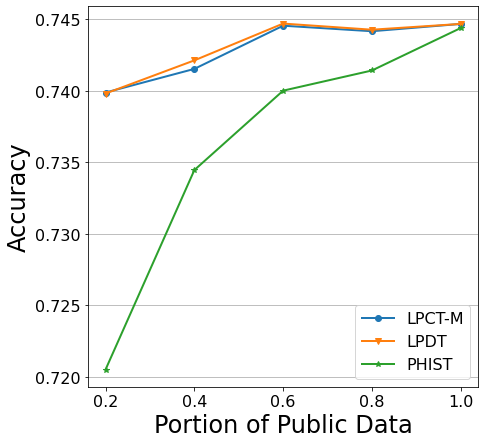

In [246]:



fig, ax = plt.subplots(figsize=(7,7))
epsilon = 1000


x = [0.2, 0.4, 0.6, 0.8, 1.0]

y = df_mean['accuracy'][(df_mean["epsilon"] == epsilon)  *(df_mean["n_pub"] == 200) * (df_mean["method"] == "LPCT-M")]
_ = plt.plot(x,y,linewidth=2,label= 'LPCT-M'.format(epsilon),marker = "o")

y = df_mean['accuracy'][(df_mean["epsilon"] == epsilon)  *(df_mean["n_pub"] == 200) * (df_mean["method"] == "LPCT-original")]
_ = plt.plot(x,y,linewidth=2,label= 'LPDT'.format(epsilon),marker = "v")

y = df_mean['accuracy'][(df_mean["epsilon"] == epsilon)  *(df_mean["n_pub"] == 504) * (df_mean["method"] == "LDPHIST")]
_ = plt.plot(x,y,linewidth=2,label= 'PHIST'.format(epsilon),marker = "*")





_ = plt.ylabel("Accuracy", fontsize=24)
_ = plt.xlabel("Portion of Public Data", fontsize=24)
_ = plt.legend(fontsize = 16)
_ = plt.xticks(fontsize = 16)
_ = plt.yticks(fontsize = 16)
_ = plt.grid(axis = 'y')

_ = ax.set_xticks( x )


plt.savefig("./results/plot/utility_by_public_2.pdf",bbox_inches="tight")